# Introduction to Deep Learning
## Part 1 - Linear perceptron and the concept of learning

Discussion is on the structure of a neuron and the algorithmic concept concept behind learning.
The coded example single linear neuron or perceptron, learning the logic OR and AND Gates.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline  

## Inspiration - The Biological Neuron Model
**The Neuron cell takes a binary input (of electrical signals), process it, and produce binary output (of electrical signal).**<br>

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/neuron3.PNG)

**Neuron Input**<br>
A neuron accepts inputs, usually from other neurons, through its dendrites, that are connect to other neurons via a gap called a synapse which assigns a "weight" to any specific input. <br>
All of these inputs are processed together in the cell body (soma)<br>

**Neuron Output**<br>
The Neurons process the combination of the inputs, and if it exceeds a certain threshold, an output signal is produced (the neuron "fires")<br>
When the neuron fires, the signal (output) travels along the axon to the synapse terminals,there it assigned a "weight", and continue to the dendrites of other neurons through the synapse.<br>
With this biological model in mind, we can define a mathematical artificial neuron.

## Perceptron - An Artificial Neural Network
As in the Biological model, we want the neuron to intake an inputs, process it (weighted sum) and if it exceeds a threshold, the neuron will produce an output. 

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/perceptron_paradigma3.png)


## Decision Units - Activation functions
There are many options for decision units, and we will see later. Lets start with the basic one, defined by McCulloch-Pitts (1943)
### Binary threshold unit
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part1_form1.JPG)



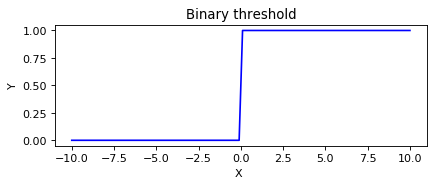

In [2]:
uplot.drow_binary_threshold()

## Learning the Bias
Now we need to learn the weights and the bias. But we can use a trick, to avoid separate scheme, for learning the bias. 
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part1_form2.JPG)
> This way, we can learn the bias as it was part of the weights. 

## Learning weights
The idea is to go over the samples, and correct/update the weights according to the results on the samples.
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/dl3.jpg)
#### Update the weights
There are many strategies to update the weights, and we will see them later.


### Perceptron Example - Logic OR
Lets build a Perceptron, that performs a logic OR:


X1 | X2 | OR
--- | --- | ---
*0* | 0 | **0**
*1* | 0 | **1**
*0* | 1 | **1**
*1* | 1 | **1**

* $X$ is the input
* $w$ are the weights
* $X*w$ is the input to the activation function
$$z = Xw$$
* $\hat{y}$ is the 0/1 output from activation
$$ \hat{y} = \begin{cases} 1 & z \geqslant  0\\ 0 & otherwise \end{cases}$$


The scheme will be to Go over all training cases in any order, and:
  * If the output is correct, continue
  * If output < label  (increase $w$): $\to{w} = {w} + {X}_{i}$
  * If output > label (decrease $w$): $\to{w} = {w} - {X}_{i}$

In [3]:
# The activation function
def binary_threshold_activation(Xw):
    yhat = 0
    if(Xw > 0):
        yhat = 1
    return yhat

In [4]:
def predict(X, w):
    yhat = 0
    z = np.dot(X, w)
    if(z > 0):
        yhat = 1
    return yhat

In [10]:
def perceptron_train(X, Y,n=7):

    w = np.zeros(len(X[0]))
    errors = []
    
    for t in range(n):
        
        print('--------------------------\nepoch: ' , t)
        total_error = 0
        
        for i in range(X.shape[0]):
             
            z = np.dot(X[i], w)
            yhat = binary_threshold_activation(z)
            
            if (yhat == Y[i]):
                print(i,'x:',X[i],'w:', w,'Wx: ', np.dot(X[i], w),
                      'y:',Y[i], end=' ')
                print('correct no update')
                continue
                
            elif (yhat < Y[i]):
                total_error += 1
                print(i, 'yhat<y', 'X:',X[i],'w:', w,'Wx:',
                      np.dot(X[i], w), 'y:',Y[i], end=' ')
        
                
                w = w + X[i]
                print('=> W updated:', w)
                
            elif (yhat > Y[i]):
                total_error += 1
                print(i, 'yhat>y' ,'X:',X[i],'w:', w,'Wx:', 
                      np.dot(X[i], w), 'y:',Y[i] ,end = ' ')
                
                w = w - X[i]
                print('=> W updated:', w)
                
        errors.append(total_error)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

--------------------------
epoch:  0
0 x: [1 0 0] w: [0. 0. 0.] Wx:  0.0 y: 0 correct no update
1 yhat<y X: [1 1 0] w: [0. 0. 0.] Wx: 0.0 y: 1 => W updated: [1. 1. 0.]
2 x: [1 0 1] w: [1. 1. 0.] Wx:  1.0 y: 1 correct no update
3 x: [1 1 1] w: [1. 1. 0.] Wx:  2.0 y: 1 correct no update
--------------------------
epoch:  1
0 yhat>y X: [1 0 0] w: [1. 1. 0.] Wx: 1.0 y: 0 => W updated: [0. 1. 0.]
1 x: [1 1 0] w: [0. 1. 0.] Wx:  1.0 y: 1 correct no update
2 yhat<y X: [1 0 1] w: [0. 1. 0.] Wx: 0.0 y: 1 => W updated: [1. 1. 1.]
3 x: [1 1 1] w: [1. 1. 1.] Wx:  3.0 y: 1 correct no update
--------------------------
epoch:  2
0 yhat>y X: [1 0 0] w: [1. 1. 1.] Wx: 1.0 y: 0 => W updated: [0. 1. 1.]
1 x: [1 1 0] w: [0. 1. 1.] Wx:  1.0 y: 1 correct no update
2 x: [1 0 1] w: [0. 1. 1.] Wx:  1.0 y: 1 correct no update
3 x: [1 1 1] w: [0. 1. 1.] Wx:  2.0 y: 1 correct no update
--------------------------
epoch:  3
0 x: [1 0 0] w: [0. 1. 1.] Wx:  0.0 y: 0 correct no update
1 x: [1 1 0] w: [0. 1. 1.] Wx:  1

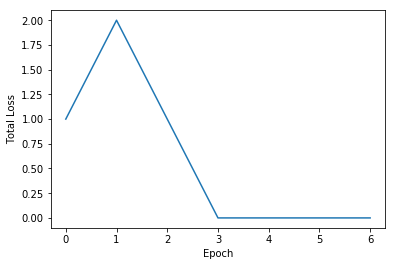

In [11]:
X = [[1,0,0],
    [1,1,0],
    [1,0,1],
    [1,1,1]]

y = [0, 1, 1, 1]

w=perceptron_train(np.array(X),y)
print('Learned Weights:', w)


### Predict OR with The learned weights of the Perceptron

In [12]:
for i in range(4):
    print(X[i], X[i][1],' OR ', X[i][2],' = ', predict(X[i],w))


[1, 0, 0] 0  OR  0  =  0
[1, 1, 0] 1  OR  0  =  1
[1, 0, 1] 0  OR  1  =  1
[1, 1, 1] 1  OR  1  =  1


# Exercise
## Re-train Perceptron to Preform logic AND
* How many epoch's needed ?
* what are the learned weights ?
* Check weights by predicting logic AND 

### Re-train Percepron to Preform logic AND
Same perceptron,can learn to perform logic AND, When its trained on the correct data:

X1 | X2 | AND
--- | --- | ---
*0* | 0 | **0**
*1* | 0 | **0**
*0* | 1 | **0**
*1* | 1 | **1**

--------------------------
epoch:  0
0 x: [1 0 0] w: [0. 0. 0.] Wx:  0.0 y: 0 correct no update
1 x: [1 1 0] w: [0. 0. 0.] Wx:  0.0 y: 0 correct no update
2 x: [1 0 1] w: [0. 0. 0.] Wx:  0.0 y: 0 correct no update
3 yhat<y X: [1 1 1] w: [0. 0. 0.] Wx: 0.0 y: 1 => W updated: [1. 1. 1.]
--------------------------
epoch:  1
0 yhat>y X: [1 0 0] w: [1. 1. 1.] Wx: 1.0 y: 0 => W updated: [0. 1. 1.]
1 yhat>y X: [1 1 0] w: [0. 1. 1.] Wx: 1.0 y: 0 => W updated: [-1.  0.  1.]
2 x: [1 0 1] w: [-1.  0.  1.] Wx:  0.0 y: 0 correct no update
3 yhat<y X: [1 1 1] w: [-1.  0.  1.] Wx: 0.0 y: 1 => W updated: [0. 1. 2.]
--------------------------
epoch:  2
0 x: [1 0 0] w: [0. 1. 2.] Wx:  0.0 y: 0 correct no update
1 yhat>y X: [1 1 0] w: [0. 1. 2.] Wx: 1.0 y: 0 => W updated: [-1.  0.  2.]
2 yhat>y X: [1 0 1] w: [-1.  0.  2.] Wx: 1.0 y: 0 => W updated: [-2.  0.  1.]
3 yhat<y X: [1 1 1] w: [-2.  0.  1.] Wx: -1.0 y: 1 => W updated: [-1.  1.  2.]
--------------------------
epoch:  3
0 x: [1 0 0] w: [-1.  1.  2.

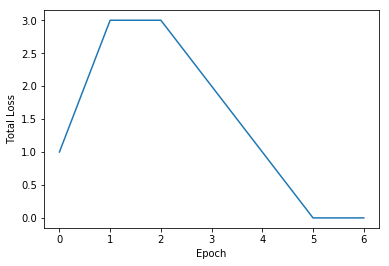

In [13]:
X = [[1,0,0],
    [1,1,0],
    [1,0,1],
    [1,1,1]]

y = [0, 0, 0, 1]

w = perceptron_train(np.array(X),y)
print('Learned Weights:', w)


### Predict AND with The learned weights of the Perceptron

In [14]:
for i in range(4):
    print(X[i], X[i][1],' AND ', X[i][2],' = ', predict(X[i],w))


[1, 0, 0] 0  AND  0  =  0
[1, 1, 0] 1  AND  0  =  0
[1, 0, 1] 0  AND  1  =  0
[1, 1, 1] 1  AND  1  =  1
